# pystrat-tutorial

This Jupyter notebook is intended to demonstrate core *pystrat* functionality.

The *pystrat* package is available here: https://github.com/yuempark/pystrat and can also be installed via `pip`: `pip install pystrat`

The data used for demonstration purposes in this notebook comes from a stratigraphic section measured in the Tonian-Cryogenian Tambien Group of northern Ethiopia. The significance of the Tambien Group for understanding Neoproterozoic Earth history is currently detailed in the following three studies:

* Swanson-Hysell, N.L., Maloof, A.C., Condon, D.J., Jenkin, G.R., Alene, M., Tremblay, M.M., Tesema, T., Rooney, A.D., and Haileab, B., 2015, Stratigraphy and geochronology of the Tambien Group, Ethiopia: Evidence for globally synchronous carbon isotope change in the Neoproterozoic: Geology, v. 43, p. 323-326, https://doi.org/10.1130/G36347.1.

* MacLennan, S.A., Park, Y., Swanson-Hysell, N.L., Maloof, A.C., Schoene, B., Gebreslassie, M., Antilla, E., Tesema, T., Alene, M., and Haileab, B., 2018, The arc of the Snowball: U-Pb dates constrain the Islay anomaly and the initiation of the Sturtian glaciation: Geology, v. 46, p. 539-542, https://doi.org/10.1130/G40171.1.

* Park, Y., Swanson-Hysell, N.L., MacLennan, S.A., Maloof, A.C., Gebreslassie, M., Tremblay, M.M., Schoene, B., Alene, M., Anttila, E.S.C., Tesema, T., Condon, D.J., Haileab, B., 2020, The lead-up to the Sturtian Snowball Earth: Neoproterozoic chemostratigraphy time-calibrated by the Tambien Group of Ethiopia: GSA Bulletin, vol. 132, pp. 1119–1149, https://doi.org/10.1130/B35178.1 

## Install pystrat

If you do not have pystrat installed, running the code cell below will install it:

In [2]:
!pip install pystrat

## Import `pystrat` and other scientific python packages

In [1]:
# standard modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pystrat
from pystrat import pystrat

## Quick Start

If you'd just like get your stratigraphic section plotted up quickly, the code below will get you started (provided that your data is set up appropriately). For a more in-depth description of *pystrat* functionality and advanced features, refer to the [Advanced Tutorial](#Advanced-Tutorial) section.

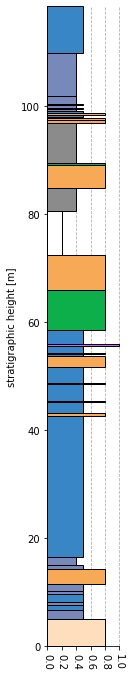

In [2]:
# read in your lithostratigraphy data
litho = pd.read_csv('example-data/lithostratigraphy.csv')

# read in your styling files
color_style = pd.read_csv('example-data/color-style.csv')
width_style = pd.read_csv('example-data/width-style.csv')

# create a pystrat Section from the lithostratigraphy data
section_01 = pystrat.Section(litho['THICKNESS'], litho['FACIES'])

# create a pystrat Style from the styling files
style_01 = pystrat.Style('facies',color_style['COLOR'],color_style[['r','g','b']]/255,
                         'facies',width_style['FACIES'],width_style['width'],
                         0.075, 1)

# plot the Section using the Style
fig, ax = pystrat.plot_stratigraphy(section_01, style_01)
plt.show(fig)

**A note on figure workflows:**

You can save any figure by adding the following line before the `plt.show()` command:

```python
plt.savefig('<name_of_figure>.pdf', bbox_inches='tight')
```

The format of the saved figure is specified with the extension of the file name (example above uses pdf).

The `bbox_inches` keyword argument ensures that the figure will not be cropped upon saving.

By default, *matplotlib* exports figures with all labels and text annotations converted to vector paths. However, it is often preferable to preserve these as text objects so that font, font size, etc. can easily be manipulated when importing the figure into vector-editing software. To do this, add one of the following lines (depending on your preferred format) to a new cell and execute it.

```python
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['pdf.fonttype'] = 42
```

## Advanced Tutorial

*pystrat* strives to take advantage of object-oriented programming (OOP) by organizing stratigraphic data into [classes](https://docs.python.org/3/tutorial/classes.html).

The core class upon which this package is built is the `Section` class, which organizes the measured stratigraphic log (i.e. the thicknesses and facies of units).

Any additional data that is tied to the stratigraphic height, but not explicitly tied to the individually measured units, is organized in the `Data` subclass.

The plotting style for a stratigraphic section is organized in the `Style` class.

The image below illustrates this class hierarchy:

<img src="./images/class-hierarchy.png" width="500">

### Organizing your Data

---

**Read in the measured section.**

In this case, the data is stored in a .csv:

In [3]:
litho = pd.read_csv('example-data/lithostratigraphy.csv')
litho.head()

,THICKNESS,FACIES,LITHOLOGY
0,4.9,recrystallized,dolomite
1,1.8,ribbonite-siltstone,dolomite
2,0.8,ribbonite,dolomite
3,0.7,ribbonite-siltstone,dolomite
4,1.4,ribbonite,dolomite


---
**Initialize a `Section` object.**

A measured stratigraphic section is fundamentally comprised of discrete units, each with a their own stratigraphic thickness and facies. *pystrat* and the `Section` object is built upon this fundamental framework.

Therefore, we initialize the `Section` object with the stratigraphic thicknesses and facies of these units, extracted from the pandas dataframe we read in above:

In [4]:
section_01 = pystrat.Section(litho['THICKNESS'], litho['FACIES'])

---
**Access `Section` attributes.**

*pystrat* takes advantage of object-oriented programming (OOP). After initialization, a `Section` object will automatically have a few basic attributes:

* `thicknesses`
    * stratigraphic thicknesses of each unit
* `facies`
    * facies of each unit
* `n_units`
    * number of units
* `total_thickness`
    * total stratigraphic thickness
* `base_height`
    * stratigraphic height at the base of each unit
* `top_height`
    * stratigraphic height at the top of each unit
* `unit_number`
    * a key for each unit
* `unique_facies`
    * unique facies
* `n_unique_facies`
    * number of unique facies
* `facies_attributes`
    * names of attributes associated with the stratigraphic units
* `data_attributes`
    * names of attributes associated with the stratigraphic height (see below)
* `generic_attributes`
    * names of generic attributes associated with neither the stratigraphic height nor the stratigraphic units (see below)
    
These attributes can be accessed in the following way:

In [5]:
section_01.total_thickness

118.4

---
**Add attributes associated with the stratigraphic units.**

Often, there will be additional data associated with the units in the stratigraphic section.

We can add an arbitrary number of such attributes using the `add_facies_attribute()` method:

In [6]:
section_01.add_facies_attribute('lithology', litho['LITHOLOGY'])

Again, these attributes can then be accessed in the following way (slicing out the first 5 values for illustrative purposes):

In [7]:
section_01.lithology[:5]

array(['dolomite', 'dolomite', 'dolomite', 'dolomite', 'dolomite'],
      dtype=object)

---
**Recover attributes associated with the stratigraphic units.**

The attributes associated with the stratigraphic units can be easily recovered using the `return_facies_dataframe()` method:

In [8]:
facies_dataframe = section_01.return_facies_dataframe()
facies_dataframe.head()

,unit_number,thicknesses,base_height,top_height,facies,lithology
0,0,4.9,0.0,4.9,recrystallized,dolomite
1,1,1.8,4.9,6.7,ribbonite-siltstone,dolomite
2,2,0.8,6.7,7.5,ribbonite,dolomite
3,3,0.7,7.5,8.2,ribbonite-siltstone,dolomite
4,4,1.4,8.2,9.6,ribbonite,dolomite


---
**Add attributes associated with the stratigraphic height.**

Often, there will also be data tied to the stratigraphic height rather than the stratigraphic units. *pystrat* organizes such data using the `Data` subclass.

A typical example of such an attribute would be chemostratigraphic data. Here, we read in some chemostratigraphic data:

In [9]:
chemo = pd.read_csv('example-data/chemostratigraphy.csv')
chemo.head()

,CARB_SAMPLE,CARB_HEIGHT,CARB_d13C,CARB_d18O,CARB_87Sr/86Sr,CARB_Al_ppm,CARB_Ca_ppm,CARB_Fe_ppm,CARB_Mg_ppm,CARB_Mn_ppm,CARB_Sr_ppm
0,T46-1.2,1.2,1.820429,0.130692,NaN,682.46931,313906.3927,293.408791,197499.6646,443.552746,539.226752
1,T46-2.1,2.1,1.597633,0.134841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T46-3.8,3.8,0.102096,-0.195867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T46-5.9,5.9,1.090520,-1.066232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T46-7.1,7.1,2.194324,-0.630248,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Add the $\delta^{13}$C data using the `add_data_attribute()` method:

In [10]:
section_01.add_data_attribute('d13C', chemo['CARB_HEIGHT'], chemo['CARB_d13C'])

This will create a `Data` subclass with the following attributes:

* `height`
    * stratigraphic height of the data
* `values`
    * values of the data
* `n_values`
    * number of values
* `height_attributes`
    * names of attributes associated with this array of stratigraphic heights
* `generic_attributes`
    * names of generic attributes associated with this `Data` object
    
These attributes can be accessed in the following way:

In [11]:
section_01.d13C.n_values

82

We can also add further attributes to this particular `Data` subclass using the `add_height_attribute()` method (for example, the sample names associated with the $\delta^{13}$C data):

In [12]:
section_01.d13C.add_height_attribute('sample', chemo['CARB_SAMPLE'])

Again, we can access these new attributes in the following way (slicing out the first 5 values for illustrative purposes):

In [13]:
section_01.d13C.sample[:5]

array(['T46-1.2', 'T46-2.1', 'T46-3.8', 'T46-5.9', 'T46-7.1'],
      dtype=object)

And we can recover them using the `return_data_dataframe()` method:

In [14]:
d13C_dataframe = section_01.d13C.return_data_dataframe()
d13C_dataframe.head()

,height,values,sample
0,1.2,1.820429,T46-1.2
1,2.1,1.597633,T46-2.1
2,3.8,0.102096,T46-3.8
3,5.9,1.090520,T46-5.9
4,7.1,2.194324,T46-7.1


We can follow the same workflow to add the rest of the chemostratigraphic data:

In [15]:
# d18O
section_01.add_data_attribute('d18O', chemo['CARB_HEIGHT'], chemo['CARB_d18O'])
section_01.d18O.add_height_attribute('sample', chemo['CARB_SAMPLE'])

# 87Sr/86Sr
section_01.add_data_attribute('Sr87Sr86', chemo['CARB_HEIGHT'], chemo['CARB_87Sr/86Sr'])
section_01.Sr87Sr86.add_height_attribute('sample', chemo['CARB_SAMPLE'])

# Al
section_01.add_data_attribute('Al', chemo['CARB_HEIGHT'], chemo['CARB_Al_ppm'])
section_01.Al.add_height_attribute('sample', chemo['CARB_SAMPLE'])

# Ca
section_01.add_data_attribute('Ca', chemo['CARB_HEIGHT'], chemo['CARB_Ca_ppm'])
section_01.Ca.add_height_attribute('sample', chemo['CARB_SAMPLE'])

# Fe
section_01.add_data_attribute('Fe', chemo['CARB_HEIGHT'], chemo['CARB_Fe_ppm'])
section_01.Fe.add_height_attribute('sample', chemo['CARB_SAMPLE'])

# Mg
section_01.add_data_attribute('Mg', chemo['CARB_HEIGHT'], chemo['CARB_Mg_ppm'])
section_01.Mg.add_height_attribute('sample', chemo['CARB_SAMPLE'])

# Mn
section_01.add_data_attribute('Mn', chemo['CARB_HEIGHT'], chemo['CARB_Mn_ppm'])
section_01.Mn.add_height_attribute('sample', chemo['CARB_SAMPLE'])

# Sr
section_01.add_data_attribute('Sr', chemo['CARB_HEIGHT'], chemo['CARB_Sr_ppm'])
section_01.Sr.add_height_attribute('sample', chemo['CARB_SAMPLE'])

We can also follow the same workflow to add a non-chemostratigraphic dataset tied to the stratigraphic height - in this case geochronology samples:

In [16]:
geochron = pd.read_csv('example-data/geochronology.csv')
geochron.head()

,ASH_SAMPLE,ASH_HEIGHT,ASH_AGE,ASH_AGE_2SIGMA
0,T46-102.2z,102.2,735.25,0.25


In [17]:
section_01.add_data_attribute('ages', geochron['ASH_HEIGHT'], geochron['ASH_AGE'])
section_01.ages.add_height_attribute('sample', geochron['ASH_SAMPLE'])

Remember that the names of all added attributes tied to the stratigraphic height can be accessed in the following way:

In [18]:
section_01.data_attributes

['d13C', 'd18O', 'Sr87Sr86', 'Al', 'Ca', 'Fe', 'Mg', 'Mn', 'Sr', 'ages']

---
**Add generic attributes.**

We can also add generic attributes to the `Section` that are neither tied to the stratigraphic height nor the stratigraphic units using the `add_generic_attribute()` method.

For example, here we add an attribute that contains the stratigraphic formations that were measured in this section:

In [19]:
section_01.add_generic_attribute('formations', ['Didikama','Matheos'])
section_01.formations

['Didikama', 'Matheos']

### Setting the Styling

To plot a stratigraphic section, the `Section` must be accompanied by a compatible `Style`. This `Style` class organizes the plotting style specified by the user.

**Read in the styling.**

In this case, the plotting style is specified in two .csv's, with the intention that the plotted color of the units will be based on the `color` attribute we added to the `Section`, and the plotted width of the units will be based on the `facies` attribute we added to the `Section`.

In [20]:
color_style = pd.read_csv('example-data/color-style.csv')
color_style.head()

,COLOR,r,g,b
0,cover,255,255,255
1,grainstone,248,169,85
2,intraclast breccia,200,100,255
3,marl,119,136,187
4,marl-ribbonite,119,136,187


In [21]:
width_style = pd.read_csv('example-data/width-style.csv')
width_style.head()

,FACIES,width
0,cover,0.2
1,grainstone,0.8
2,intraclast breccia,1.0
3,marl,0.4
4,marl-ribbonite,0.4


---
**Initialize a `Style` object.**

Values need to be assigned to seven core attributes during initialization:

* `color_attribute`
    * `Section` attribute name from which the color labels are derived
* `color_labels`
    * the labels to which colors are assigned
* `color_values`
    * the colors that will be assigned to the associated labels
* `width_attribute`
    * `Section` attribute name from with the width labels are derived
* `width_labels`
    * the labels to which widths are assigned
* `width_values`
    * the widths that will be assigned to the associated labels
* `height_scaling_factor`
    * the factor by which the height units of a `Section` will be converted to inches during plotting
* `width_inches`
    * when plotting, a width value of 1 will be this many inches wide
    
Note that:

* `color_attribute` and `width_attribute` must be valid attributes within the `Section` you are trying to plot
* the values within the associated `Section` attribute must form a subset of the `color_labels` and `width_labels`
* `color_values` can take any form that is interpretable by *matplotlib* (in this example, we use RGB values)
* `width_values` must be between 0 and 1

In [22]:
style_01 = pystrat.Style('facies',color_style['COLOR'],color_style[['r','g','b']]/255,
                         'facies',width_style['FACIES'],width_style['width'],
                         0.075, 1)

---
**Visualize the `Style`.**

We can create a legend for any `Style` using the `plot_legend()` method:

stratigraphic height scaling : 1 distance unit = 1 inch * 0.075
width value of 1 will be     : 1 inches


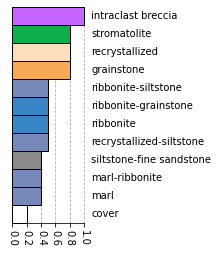

In [23]:
fig, ax = style_01.plot_legend()

plt.show(fig)

### Plotting a Section

**Check that the `Section` is compatible with the `Style`.**

As described above, the `Style` must specify attributes and labels that are compatible with any given `Section`. The `section_style_compatibility()` function tests this compatibility:

In [24]:
pystrat.section_style_compatibility(section_01, style_01)

Section and Style are compatible.


---
**Plot the `Section`**.

Plotting a stratigraphic section on its own is straight-forward - we simply use the `plot_stratigraphy()` function.

Importantly, the height of the axis is explicitly set by the `height_scaling_factor` value in the associated `Style` object, and the width of the axis is explicitly set by the `width_inches` value in the associated `Style` object. Therefore, all sections that are plotted using the same `Style` will have exactly the same scaling ratio applied to the stratigraphic height, and therefore be directly compared to one another.

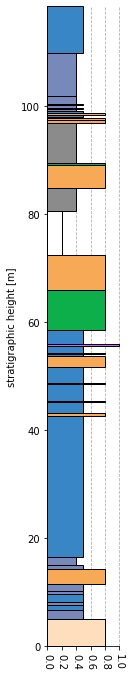

In [25]:
fig, ax = pystrat.plot_stratigraphy(section_01, style_01)

plt.show(fig)

---
**Plotting additional data.**

Additional data can be plotted alongside the stratigraphic section by changing `ncols` in the `plot_stratigraphy()` function, in a manner similar to that when using `plt.subplots()`. Additional data can then easily be plotted on top of these pre-generated axes:

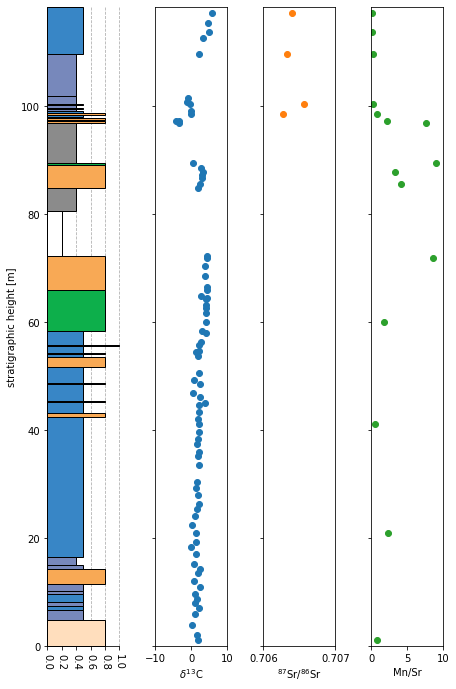

In [26]:
fig, ax = pystrat.plot_stratigraphy(section_01, style_01, ncols=4)

ax[1].scatter(section_01.d13C.values, section_01.d13C.height, c='C0')
ax[1].set_xlim(-10,10)
ax[1].set_xlabel('$\delta^{13}$C')

ax[2].scatter(section_01.Sr87Sr86.values, section_01.Sr87Sr86.height, c='C1')
ax[2].set_xlim(0.7060,0.7070)
ax[2].set_xlabel('$^{87}$Sr/$^{86}$Sr')

ax[3].scatter(section_01.Mn.values/section_01.Sr.values, section_01.Sr.height, c='C2')
ax[3].set_xlim(0,10)
ax[3].set_xlabel('Mn/Sr')

plt.show(fig)

### Additional Functionality

**Extract the facies associated with a given sample.**

We can automatically extract the facies associated with each sample in a `Data` object using `add_data_facies()`:

In [27]:
# get the facies for each sample
section_01.d13C.add_data_facies(section_01)

# pull out the dataframe
d13C_dataframe = section_01.d13C.return_data_dataframe()
d13C_dataframe

,height,values,sample,facies,unit_number
0,1.2,1.820429,T46-1.2,recrystallized,0.0
1,2.1,1.597633,T46-2.1,recrystallized,0.0
2,3.8,0.102096,T46-3.8,recrystallized,0.0
3,5.9,1.090520,T46-5.9,ribbonite-siltstone,1.0
4,7.1,2.194324,T46-7.1,ribbonite,2.0
...,...,...,...,...,...
77,109.7,2.092839,T46-109.7,!!!ON BOUNDARY!!!,42.5
78,112.6,3.220129,T46-112.6,ribbonite-grainstone,43.0
79,113.7,4.774569,T46-113.7,ribbonite-grainstone,43.0
80,115.3,4.524742,T46-115.3,ribbonite-grainstone,43.0


However, some samples may fall on unit boundaries, in which case the facies of the sample is ambiguous. The facies of such samples will have to be manually verified. We can use `clean_data_facies_helper()` and `clean_data_facies()` to assist us with this process:

In [28]:
section_01.d13C.clean_data_facies_helper('section_01.d13C')

1) Copy and paste the code below into a cell and edit as follows:
- If the sample comes from the lower unit, subtract 0.5.
- If the sample comes from the upper unit, add 0.5.

2) Run Data.clean_data_facies().
===
section_01.d13C.unit_number[7] = 4.5 #height = 9.6, sample = T46-9.6
section_01.d13C.unit_number[11] = 7.5 #height = 14.2, sample = T46-14.2
section_01.d13C.unit_number[37] = 14.5 #height = 48.5, sample = T46-48.5
section_01.d13C.unit_number[43] = 21.5 #height = 55.8, sample = T46-55.8
section_01.d13C.unit_number[54] = 23.5 #height = 65.9, sample = T46-65.9
section_01.d13C.unit_number[59] = 24.5 #height = 72.3, sample = T46-72.3
section_01.d13C.unit_number[66] = 28.5 #height = 89.4, sample = T46-89.4
section_01.d13C.unit_number[67] = 29.5 #height = 96.9, sample = T46-96.9
section_01.d13C.unit_number[68] = 30.5 #height = 97.3, sample = T46-97.3
section_01.d13C.unit_number[69] = 30.5 #height = 97.3, sample = T46-97.3
section_01.d13C.unit_number[70] = 32.5 #height = 97.7, sample 

In [29]:
# manually assign the unit_number here
section_01.d13C.unit_number[7] = 4 #height = 9.6, sample = T46-9.6
section_01.d13C.unit_number[11] = 7 #height = 14.2, sample = T46-14.2
section_01.d13C.unit_number[37] = 15 #height = 48.5, sample = T46-48.5
section_01.d13C.unit_number[43] = 21 #height = 55.8, sample = T46-55.8
section_01.d13C.unit_number[54] = 24 #height = 65.9, sample = T46-65.9
section_01.d13C.unit_number[59] = 24 #height = 72.3, sample = T46-72.3
section_01.d13C.unit_number[66] = 28 #height = 89.4, sample = T46-89.4
section_01.d13C.unit_number[67] = 30 #height = 96.9, sample = T46-96.9
section_01.d13C.unit_number[68] = 30 #height = 97.3, sample = T46-97.3
section_01.d13C.unit_number[69] = 31 #height = 97.3, sample = T46-97.3
section_01.d13C.unit_number[70] = 32 #height = 97.7, sample = T46-97.7
section_01.d13C.unit_number[73] = 39 #height = 99.6, sample = T46-99.6
section_01.d13C.unit_number[74] = 40 #height = 100.4, sample = T46-100.4
section_01.d13C.unit_number[77] = 42 #height = 109.7, sample = T46-109.7

In [30]:
# reassign the facies for each sample
section_01.d13C.clean_data_facies(section_01)

# pull out the dataframe
d13C_dataframe = section_01.d13C.return_data_dataframe()
d13C_dataframe

,height,values,sample,facies,unit_number
0,1.2,1.820429,T46-1.2,recrystallized,0
1,2.1,1.597633,T46-2.1,recrystallized,0
2,3.8,0.102096,T46-3.8,recrystallized,0
3,5.9,1.090520,T46-5.9,ribbonite-siltstone,1
4,7.1,2.194324,T46-7.1,ribbonite,2
...,...,...,...,...,...
77,109.7,2.092839,T46-109.7,marl-ribbonite,42
78,112.6,3.220129,T46-112.6,ribbonite-grainstone,43
79,113.7,4.774569,T46-113.7,ribbonite-grainstone,43
80,115.3,4.524742,T46-115.3,ribbonite-grainstone,43
